# Training Digit classifier

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [2]:
import pickle
import numpy as np

### Loading Data

In [3]:
d = open("data.pickle","rb")
data = pickle.load(d)

In [4]:
data = np.array(data)

### Loading labels

In [5]:
# Diction of all classes
alphabets_dic = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
             20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '0', 27: '1', 28: '2', 29:'3',
             30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9'}

In [6]:
# Loading the labels
l = open("labels.pickle","rb")
labels = pickle.load(l)

In [7]:
# Converting classes to integers
labels_integer = []
count = 0
for i in labels:
    for j in range(len(alphabets_dic)):
        if alphabets_dic[j] == i:
            labels_integer.append(j)

### One-Hot Encoding

In [8]:
from keras.utils import np_utils

In [9]:
num_of_classes = 36
lbls = np_utils.to_categorical(labels_integer, num_of_classes)

In [20]:
# Converting in Integer
lbls = np.asarray(lbls).astype('int')

### Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [21]:
# 80:20 Split
X_train, X_test, y_train, y_test = train_test_split(data, lbls, test_size=0.20, random_state=42)

In [22]:
# Adding one more channel
X_train = X_train.reshape(29260,28,28,1)
X_test = X_test.reshape(7316,28,28,1)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29260, 28, 28, 1)
(7316, 28, 28, 1)
(29260, 36)
(7316, 36)


### Building Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

In [27]:
# model Summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### Compiling the Model

In [28]:
# Loss = "categorical_crossentropy"
# Optimizer = "Adam"
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model

In [29]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
458/458 [==============================] - 53s 115ms/step - loss: 2.4138 - accuracy: 0.3142 - val_loss: 0.5787 - val_accuracy: 0.8457
Epoch 2/20
458/458 [==============================] - 53s 116ms/step - loss: 0.7222 - accuracy: 0.7869 - val_loss: 0.3294 - val_accuracy: 0.9095
Epoch 3/20
458/458 [==============================] - 53s 115ms/step - loss: 0.4600 - accuracy: 0.8674 - val_loss: 0.2541 - val_accuracy: 0.9321
Epoch 4/20
458/458 [==============================] - 53s 116ms/step - loss: 0.3632 - accuracy: 0.8945 - val_loss: 0.2209 - val_accuracy: 0.9359
Epoch 5/20
458/458 [==============================] - 53s 116ms/step - loss: 0.3122 - accuracy: 0.9071 - val_loss: 0.2051 - val_accuracy: 0.9415
Epoch 6/20
458/458 [==============================] - 53s 116ms/step - loss: 0.2895 - accuracy: 0.9141 - val_loss: 0.2013 - val_accuracy: 0.9422
Epoch 7/20
458/458 [==============================] - 54s 117ms/step - loss: 0.2675 - accuracy: 0.9195 - val_loss: 0.1757 - val_ac

### Saving the model

In [30]:
model.save('cnn_classifier.h5')

### Vizualising Results

In [32]:
import matplotlib.pyplot as plt

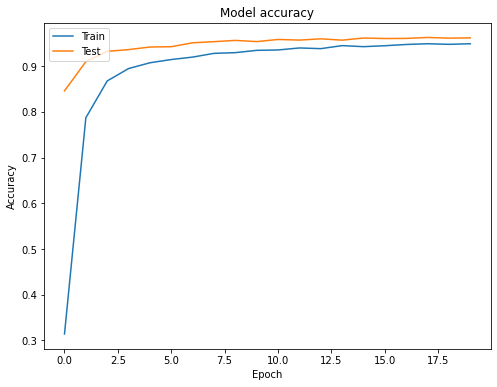

In [33]:
# Accuracy
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Accuracy.png')
plt.show()

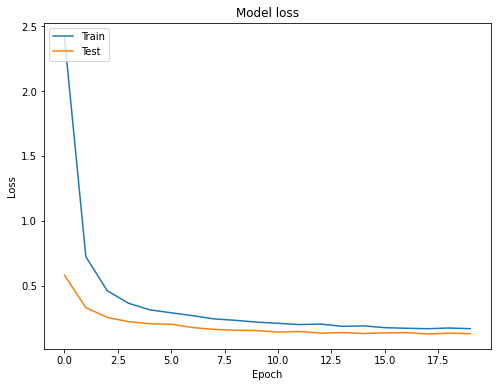

In [34]:
# Loss
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("Loss.png")
plt.show()